<h1 style="text-align: center;">Étude de Marché :</h1>
<h2 style="text-align: center;">Analyse des données pour l'exportation de poulet</h2>

<div style="text-align: center;">
    <img src="data/logo.jpg" alt="Mon logo" width="300"/>
</div>

# *Rappel de la Mission*

## I - Contexte
Lancement à l'international de l’entreprise sur le marché du poulet, sans cible géographique précise.

## II - Objectif
Analyser et identifier des groupements de pays potentiels à cibler à partir des données FAO (Food and Agriculture Organization).

## III- Méthodologie
1. **Choix des indicateurs** : Sélection des données pertinentes pour l'analyse.
2. **Classification Ascendante Hiérarchique (CAH)** : Construction d'un dendrogramme pour visualiser les groupes.
3. **K-means** : Partitionnement des pays, analyse des centroïdes et interprétation des classes.
4. **Clustering** : Comparaison des résultats de deux méthodes de clustering.
5. **Analyse en Composantes Principales (ACP)** : Visualisation des liens entre variables et pays.
6. **Analyse des résultats** : Evaluation des données obtenues pour chaque cluster.
7. **Interprétations et recommandations** : Identification des marchés prioritaires pour l'exportation selon les clusters.

## IV- Points attendus
- Identification de groupes cohérents de pays.
- Compréhension des relations entre les variables.


## Choix des Indicateurs

### 1. **Produit Intérieur Brut (PIB)**
Le PIB reflète la performance économique globale d'un pays, fournissant des indications sur le pouvoir d'achat et la demande potentielle de poulet.

### 2. **Accès à l'Électricité**
L'accès à l'électricité est crucial pour l'infrastructure et le stockage alimentaire, impactant la distribution et la consommation de poulet.

### 3. **Indice de Performance Logistique**
L'indice de performance logistique est essentiel pour garantir un transport efficace et maintenir la qualité du produit.

### 4. **Stabilité Politique**
La stabilité politique crée un environnement commercial sécurisé et prévisible pour l'exportation.

### 5. **Disponibilité Alimentaire de la Viande de Volaille (kg/pers/an)**
Cet indicateur offre un aperçu de la disponibilité de la viande de volaille dans un pays. Une disponibilité alimentaire élevée peut indiquer une demande potentielle plus élevée.

### 6. **Taux d'Autosuffisance Alimentaire en Viande de Volaille**
Ce taux mesure dans quelle mesure un pays peut répondre à ses besoins alimentaires avec sa propre production.

### 7. **Taux de Dépendance aux Importations en Viande de Volaille**
Le taux de dépendance aux importations en viande de volaille indique dans quelle mesure un pays dépend des importations pour répondre à sa demande.

### 8. **Taux de Variation de la Population sur 3 ans**
Ce taux offre une perspective dynamique sur l'évolution démographique d'un pays, permettant de repérer des tendances comme une croissance rapide, un vieillissement de la population ou les effets des migrations importantes.

Les changements démographiques influencent directement la demande de produits. Une variation significative de la population peut nécessiter des ajustements dans les stratégies de marketing et de distribution pour répondre efficacement aux besoins du marché cible. 

# PARTIE I : Préparation, nettoyage, et analyse exploratoire des données.

# Sommaire PARTIE I

- **A** - Importation des librairies
- **B** - Importation des données
- **C** - Nettoyage des données
- **D** - Fusion des données et traitement des valeurs manquantes
- **E** - Traitement des outliers
- **F** - Distribution des variables
- **G** - Étude de la colinéarité


# A- Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import geopandas as gpd

from shapely.geometry import Point
from sklearn.linear_model import LinearRegression

# B- Import des données

In [2]:
# source: FAO

code_pays= pd.read_csv("file:data/code_pays.csv")
code_pays_anglais= pd.read_csv("file:data/code_pays_anglais.csv")
acces_electricite= pd.read_csv("file:data/acces_electricite1.csv"\
                       ,sep=";" ,encoding='ISO-8859-1')
logistique= pd.read_csv("file:data/Indice de performance logistique  performance globale1.csv"\
                       ,sep=";" ,encoding='ISO-8859-1')
disponibilite_Alimentaire_2017= pd.read_csv("file:data/DisponibiliteAlimentaire_2017.csv")

PIB_habitant= pd.read_excel("file:data/PIB_2017_HABITANT.xlsx")
stabilité_politique= pd.read_csv("file:data/Stabilité_politique1.csv"\
                                 ,sep=";" ,encoding='ISO-8859-1')
population = pd.read_csv("file:data/Population_2000_2018.csv" )


In [3]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


# C- NETTOYAGE DES DONNEES


## Table 1: Code_pays

In [4]:
# Renommage des colonnes:
code_pays= code_pays.rename(columns = { "Code Pays": "c_pays", "Pays":"pays_français",\
                                       "Code ISO2":"code ISO2", "Code ISO3":"code ISO3"})
code_pays_anglais= code_pays_anglais.rename(columns = {"ISO3 Code": "code ISO3","Country":"pays_anglais"})       
listing_pays_1 = pd.merge(code_pays, code_pays_anglais, how='outer',on=["code ISO3"])

In [5]:
listing_pays_1

,c_pays,pays_français,Code M49,code ISO2,code ISO3,Année de début,Año de inicio,Country Code,pays_anglais,M49 Code,ISO2 Code,Start Year,End Year
0,2,Afghanistan,4,AF,AFG,NaN,NaN,2,Afghanistan,4,AF,NaN,NaN
1,5100,Afrique,2,F5100,X06,NaN,NaN,5100,Africa,2,F5100,NaN,NaN
2,5104,Afrique australe,18,F5104,F5104,NaN,NaN,5104,Southern Africa,18,F5104,NaN,NaN
3,5102,Afrique centrale,17,F5102,F5102,NaN,NaN,5102,Middle Africa,17,F5102,NaN,NaN
4,429,Afrique du Nord (Soudan Excl),746,F429,F429,NaN,NaN,429,Northern Africa (excluding Sudan),746,F429,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,249,Yémen,887,YE,YEM,NaN,NaN,249,Yemen,887,YE,NaN,NaN
341,247,Yemen Dém,720,F247,F247,NaN,NaN,247,Yemen Dem,720,F247,NaN,NaN
342,246,Yémen Rép A,886,F246,F246,NaN,NaN,246,Yemen Ar Rp,886,F246,NaN,NaN
343,251,Zambie,894,ZM,ZMB,NaN,NaN,251,Zambia,894,ZM,NaN,NaN


In [6]:

# selection des colonnes qui nous interessent
cols_pays = ["c_pays", "pays_français","pays_anglais","Code M49","code ISO2", "code ISO3"]
listing_pays_2=listing_pays_1[cols_pays]

listing_pays_2.head()
listing_pays_2.shape

(345, 6)

In [7]:
#Création de la df liste_pays
liste_pays=listing_pays_2.loc[listing_pays_2["c_pays"]<366,:]
liste_pays

,c_pays,pays_français,pays_anglais,Code M49,code ISO2,code ISO3
0,2,Afghanistan,Afghanistan,4,AF,AFG
5,202,Afrique du Sud,South Africa,710,ZA,ZAF
11,3,Albanie,Albania,8,AL,ALB
12,4,Algérie,Algeria,12,DZ,DZA
13,79,Allemagne,Germany,276,DE,DEU
...,...,...,...,...,...,...
340,249,Yémen,Yemen,887,YE,YEM
341,247,Yemen Dém,Yemen Dem,720,F247,F247
342,246,Yémen Rép A,Yemen Ar Rp,886,F246,F246
343,251,Zambie,Zambia,894,ZM,ZMB


In [8]:
#suppression des lignes qui ne sont pas des pays 
liste_a_supprimer = liste_pays[liste_pays["code ISO2"].isin (['F78', 'F77', 'F336', 'F278', \
                                                              'F62', 'F274','F259', 'F284','F283' ,'F299', 'F248', \
                                                              'F282', 'F285', 'F280', 'F206',  'F164','F228', 'F247', 'F246'])]
liste_a_supprimer

,c_pays,pays_français,pays_anglais,Code M49,code ISO2,code ISO3
14,78,Allemagne Fr,Germany Fr,280,F78,F78
15,77,Allemagne Nl,Germany Nl,278,F77,F77
20,336,Amérique Nord et Centrale,North and Central America,637,F336,F336
60,278,"Bonaire, Saint-Eustache et Saba","Bonaire, Sint Eustatius and Saba",535,F278,BES
106,62,Éthiopie RDP,Ethiopia PDR,230,F62,F62
144,274,Guernesey,Guernsey,831,F274,GGY
160,259,Îles Anglo-Normandes,Channel Islands,830,F259,CHA
163,284,Îles d'Åland,Åland Islands,248,F284,ALA
190,283,Jersey,Jersey,832,F283,JEY
246,299,Palestine,Palestine,275,F299,PSE


In [9]:
liste_a_supprimer.shape

(19, 6)

In [10]:
liste_pays = liste_pays.drop(liste_pays[liste_pays["code ISO2"].isin(liste_a_supprimer)].index)

In [11]:
liste_pays.shape

(269, 6)

In [12]:
liste_pays["pays_français"].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Allemagne Fr', 'Allemagne Nl', 'Amérique Nord et Centrale',
       'Andorre', 'Angola', 'Anguilla', 'Antarctique',
       'Antigua-et-Barbuda', 'Antilles néerlandaises (ex)',
       'Arabie saoudite', 'Archipel des Chagos', 'Argentine', 'Arménie',
       'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus', 'Belgique',
       'Belgique-Luxembourg', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'

In [13]:
liste_a_supprimer2= ['Île Bouvet', 'Île Christmas', 'Île de Man', 'Île Johnston', 'Île Midway', \
                    'Île Norfolk', 'Îles Anglo-Normandes','Amérique Nord et Centrale',"Éthiopie RDP",'Allemagne Fr' , \
                    'Îles Caïmanes', 'Îles Cook', "Îles d'Åland", 'Îles des Cocos (Keeling)', 'Allemagne Nl',\
                    'Îles Falkland (Malvinas)', 'Îles Féroé', \
                    'Îles Heard et McDonald', 'Îles Mariannes du Nord', 'Îles Marshall', \
                    'Îles mineures éloignées des États-Unis', 'Îles Salomon', 'Îles Svalbard-et-Jan Mayen', \
                    'Îles Turques-et-Caïques', 'Îles Vierges américaines',\
                    'Îles Vierges britanniques', 'Îles Wake', 'Îles Wallis-et-Futuna','Anguilla', 'Antarctique', \
                     'Antilles néerlandaises (ex)',
                    'Archipel des Chagos', 'Aruba', 'Belgique-Luxembourg', 'Bermudes',\
                    'Bonaire, Saint-Eustache et Saba', 'Chine - RAS de Hong-Kong',\
                    'Chine - RAS de Macao', 'Chine, continentale', 'Chine, Taiwan Province de',\
                    'Curaçao', 'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook',\
                    "Îles d'Åland", 'Îles des Cocos (Keeling)', 'Îles Falkland (Malvinas)',\
                    'Îles Féroé', 'Îles Heard et McDonald', 'Îles Mariannes du Nord',\
                    'Îles Marshall', 'Îles mineures éloignées des États-Unis', 'Îles Salomon',\
                    'Îles Svalbard-et-Jan Mayen', 'Îles Turques-et-Caïques',\
                    'Îles Vierges américaines', 'Îles Vierges britanniques', 'Îles Wake',\
                    'Îles Wallis-et-Futuna', 'Jersey', 'Montserrat', 'Nouvelle-Calédonie',\
                    'Pays-Bas (Royaume des)', 'Polynésie française', 'Porto Rico','Réunion',\
                     'Sainte-Hélène, Ascension et Tristan da Cunha', 'Saint-Martin (partie française)', \
                     'Saint-Pierre-et-Miquelon', 'Saint-Siège', 'Samoa américaines',]
liste_pays = liste_pays.drop(liste_pays[liste_pays["pays_français"].isin(liste_a_supprimer2)].index)

In [14]:
liste_pays.shape

(216, 6)

In [15]:
liste_pays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 344
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   c_pays         216 non-null    int64 
 1   pays_français  216 non-null    object
 2   pays_anglais   216 non-null    object
 3   Code M49       216 non-null    int64 
 4   code ISO2      215 non-null    object
 5   code ISO3      216 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.8+ KB


## Table 2:  Pourcentage de la population ayant accès à l'électricité (%pop_acces_electricite)

In [16]:
# Renommage des colonnes:
acces_electricite= acces_electricite.rename(columns = { "ï»¿Country Name":"Pays", "Country Code": "code ISO3"})
# selection des colonnes qui nous interessent
cols_e = ["Pays","code ISO3", "2017"]
acces_electricite=acces_electricite[cols_e]
# Renommage colonnes 2017 en %pop_acces_electricite ( pourcentage population ayant accès à l'électricité)
acces_electricite= acces_electricite.rename(columns = { "2017":"%pop_acces_electricite"})
acces_electricite.info()
acces_electricite.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pays                    264 non-null    object 
 1   code ISO3               266 non-null    object 
 2   %pop_acces_electricite  263 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


,Pays,code ISO3,%pop_acces_electricite
0,Aruba,ABW,100.000000
1,NaN,AFE,40.197332
2,Afghanistan,AFG,97.700000
3,NaN,AFW,48.787640
4,Angola,AGO,42.906242


In [17]:
acces_electricite["%pop_acces_electricite"].unique()

array([100.        ,  40.19733187,  97.7       ,  48.78764024,
        42.90624237,  99.89      ,  90.66275374,  99.7       ,
                nan,   9.3       ,  34.5       ,  17.01332092,
        88.        ,  98.06486511,  98.74201202,  94.15032959,
        91.8       ,  99.8       ,  67.4       ,  14.070508  ,
        99.86672278,  65.6       ,  60.90362167,  17.98682594,
        46.2067337 ,  98.5       ,  78.70983124,  88.61360931,
        99.6       ,  97.22818615,  99.39618683,  60.2       ,
        98.88589478,  99.53002167,  97.45668246,  90.52575608,
        97.70246614,  99.91351285,  99.96275072,  99.2       ,
        48.02331161,  44.3       ,  99.96931321,  54.55778201,
        96.        ,  76.53897095,  86.27      ,  79.        ,
        35.4       ,  56.2       ,  26.        ,  66.35205841,
        92.19764709,  93.3       ,  89.98953247,  99.96616438,
        86.5       ,  41.51366447,  43.29354095,  96.60874231,
        87.26121836,  60.24500423,  71.87355536,  98.14

In [18]:
# arrondies à deux décimales des valeurs 

acces_electricite["%pop_acces_electricite"] = acces_electricite["%pop_acces_electricite"].round(2)


In [19]:

acces_electricite.describe()

,%pop_acces_electricite
count,263.000000
mean,84.499354
std,24.947187
min,4.200000
25%,79.090000
50%,99.280000
75%,100.000000
max,100.000000


In [20]:
acces_electricite.shape

(266, 3)

In [21]:
# Variables qui ont des valeurs manquantes
acces_electricite.isna().sum()

Pays                      2
code ISO3                 0
%pop_acces_electricite    3
dtype: int64

In [22]:
nb_na = acces_electricite.isnull().sum()
nb_na[nb_na>0]
nb_na.head()


Pays                      2
code ISO3                 0
%pop_acces_electricite    3
dtype: int64

In [23]:
acces_electricite.loc[acces_electricite['Pays'].isnull(),:]

,Pays,code ISO3,%pop_acces_electricite
1,NaN,AFE,40.20
3,NaN,AFW,48.79


In [24]:
# recherche des  valeurs AFE ET AFW dans la table code_pays 
value_to_find = 'AFE'
result = liste_pays.loc[liste_pays['code ISO3'] == value_to_find]

print(result)

Empty DataFrame
Columns: [c_pays, pays_français, pays_anglais, Code M49, code ISO2, code ISO3]
Index: []


In [25]:
# recherche des  valeurs AFE ET AFW dans la table code_pays 
value_to_find2 = 'AFW'
result1 = liste_pays.loc[liste_pays['code ISO3'] == value_to_find2]
print(result1)

Empty DataFrame
Columns: [c_pays, pays_français, pays_anglais, Code M49, code ISO2, code ISO3]
Index: []


In [26]:
acces_electricite['code ISO3'].unique()

array(['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE',
       'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ',
       'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR',
       'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST',
       'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC',
       'HRV', 'HTI', 'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX',
       'IMN', 'IND', 'INX', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
       'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA',
       'KOR', 'KWT',

In [27]:
acces_electricite.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
%pop_acces_electricite,263.0,84.499354,24.947187,4.2,79.09,99.28,100.0,100.0


### Table 3: **Indice de Performance Logistique (perf_logistique)**
Noté de 1 à 5, où 5 représente la meilleure note, indiquant une excellente performance logistique.


In [28]:
logistique.head()

,ï»¿Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Column1
0,Aruba,ABW,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,2.469728,NaN,2.578623,NaN,2.492222,NaN,NaN,NaN,2.618182,NaN
2,Afghanistan,AFG,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,2.069573,NaN,2.141282,NaN,1.950000,NaN,NaN,NaN,1.900000,NaN
3,NaN,AFW,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,2.451831,NaN,2.349977,NaN,2.413333,NaN,NaN,NaN,2.473333,NaN
4,Angola,AGO,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,2.542980,NaN,2.241183,NaN,2.050000,NaN,NaN,NaN,2.100000,NaN


In [29]:
# Renommage des colonnes:
logistique= logistique.rename(columns = { "ï»¿Country Name":"Pays", "Country Code": "code ISO3"})
# selection des colonnes qui nous interessent
cols_l = ["Pays","code ISO3","2014","2016","2017", "2018"]
logistique=logistique[cols_l]

logistique.info()
logistique.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pays       264 non-null    object 
 1   code ISO3  266 non-null    object 
 2   2014       207 non-null    float64
 3   2016       207 non-null    float64
 4   2017       0 non-null      float64
 5   2018       207 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.6+ KB


(266, 6)

In [30]:
logistique.head()

,Pays,code ISO3,2014,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN
1,NaN,AFE,2.469728,2.578623,NaN,2.492222
2,Afghanistan,AFG,2.069573,2.141282,NaN,1.950000
3,NaN,AFW,2.451831,2.349977,NaN,2.413333
4,Angola,AGO,2.542980,2.241183,NaN,2.050000


In [31]:
#recherche des valeurs manquantes 
logistique.isna().sum()

Pays           2
code ISO3      0
2014          59
2016          59
2017         266
2018          59
dtype: int64

In [32]:
logistique['code ISO3'].nunique()

266

In [33]:
#Remplacement des valeurs manquantes pour l'anné 2017

# le taux de changement moyen entre 2014 et 2018 (pente)

pente = (logistique['2018'] - logistique['2014']) / 4  # 4 car il y a 4 années d'écart entre 2014 et 2018

# Estimation de la valeur de 2017 en utilisant l'interpolation linéaire ( on suppose ici que la tenndance est linéaire).\
# il n'est pas possible de faire une regression linéaire car nous avons très peu de donnée)

logistique['2017'] = logistique['2016'] + pente * 2  # 2 car il y a 2 années d'écart entre 2016 et 2017

In [34]:
logistique.isna().sum()

Pays          2
code ISO3     0
2014         59
2016         59
2017         72
2018         59
dtype: int64

In [35]:
missing_values = logistique[logistique['2014'].isna() | logistique['2016'].isna() | logistique['2017'].isna()| logistique['2018'].isna()]
print("Données avec des valeurs manquantes dans les colonnes '2014', '2016','2017' et '2018':")
missing_values

Données avec des valeurs manquantes dans les colonnes '2014', '2016','2017' et '2018':


,Pays,code ISO3,2014,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN
5,Albanie,ALB,NaN,2.412498,NaN,2.66
6,Andorre,AND,NaN,NaN,NaN,NaN
11,Samoa amÃ©ricaines,ASM,NaN,NaN,NaN,NaN
12,Antigua-et-Barbuda,ATG,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
256,Ãles Vierges (EU),VIR,NaN,NaN,NaN,NaN
258,Vanuatu,VUT,NaN,NaN,NaN,NaN
260,Samoa,WSM,NaN,NaN,NaN,NaN
261,Kosovo,XKX,NaN,NaN,NaN,NaN


In [36]:
missing_values.isna().sum()

Pays          0
code ISO3     0
2014         59
2016         59
2017         72
2018         59
dtype: int64

In [37]:
# Liste des pays ayant au moins une valeur nulle sur les trois années de références 
missing_values["Pays"].unique()

array(['Aruba', 'Albanie', 'Andorre', 'Samoa amÃ©ricaines',
       'Antigua-et-Barbuda', 'AzerbaÃ¯djan', 'Belize', 'Bermudes',
       'Barbade', 'BrunÃ©i Darussalam', 'Botswana',
       'RÃ©publique centrafricaine', 'Ã\x8eles Anglo-Normandes',
       'Cabo Verde', 'Curacao', 'Ã\x8eles CaÃ¯mans', 'Dominique',
       'Ã\x89thiopie', 'Ã\x8eles FÃ©roÃ©',
       'MicronÃ©sie, Ã\x89tats fÃ©dÃ©rÃ©s de', 'Gibraltar', 'Gambie',
       'Grenade', 'Groenland', 'Guam', 'Ã\x8ele de Man', 'Non classifiÃ©',
       'Iran, RÃ©publique islamique dâ\x80\x99', 'Kiribati',
       'Saint-Kitts-et-Nevis', 'Sainte-Lucie', 'Liechtenstein',
       'Sri Lanka', 'RÃ©gion administrative spÃ©ciale de Macao, Chine',
       'Saint-Martin (fr)', 'Maroc', 'Monaco', 'Ã\x8eles Marshall',
       'Mariannes', 'Mozambique', 'Maurice', 'Malawi', 'Namibie',
       'Nouvelle-CalÃ©donie', 'Nicaragua', 'Nauru', 'Palaos',
       'Porto Rico', 'CorÃ©e, RÃ©publique dÃ©mocratique de',
       'Cisjordanie et Gaza', 'PolynÃ©sie franÃ§

In [38]:
logistique.loc[logistique['Pays'].isnull(),:]

,Pays,code ISO3,2014,2016,2017,2018
1,NaN,AFE,2.469728,2.578623,2.589870,2.492222
3,NaN,AFW,2.451831,2.349977,2.330728,2.413333


In [39]:
# selection des colonnes qui nous interessent
cols_l1 = ["Pays","code ISO3","2017"]
logistique=logistique[cols_l1]

# arrondies à deux décimales des valeurs 
logistique["2017"] = logistique["2017"].round(2)

# Renommage de la colonne 2017 en perf_logistique ( indice de la performance logistique)
logistique= logistique.rename(columns = { "2017":"perf_logistique"})

logistique.info()
logistique.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pays             264 non-null    object 
 1   code ISO3        266 non-null    object 
 2   perf_logistique  194 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


(266, 3)

In [40]:

logistique.shape

(266, 3)

In [41]:
logistique.describe()

,perf_logistique
count,194.000000
mean,2.846134
std,0.608387
min,1.640000
25%,2.410000
50%,2.660000
75%,3.247500
max,4.290000


In [42]:
logistique

,Pays,code ISO3,perf_logistique
0,Aruba,ABW,NaN
1,NaN,AFE,2.59
2,Afghanistan,AFG,2.08
3,NaN,AFW,2.33
4,Angola,AGO,1.99
...,...,...,...
261,Kosovo,XKX,NaN
262,"YÃ©men, RÃ©p. du",YEM,NaN
263,Afrique du Sud,ZAF,3.75
264,Zambie,ZMB,2.46


## Table 4: Produit intérieur brut par habitant (PIB)

In [43]:

PIB_habitant.head()

,Code zone (M49),Zone,Année,Valeur,Note
0,4,Afghanistan,2017,530.149831,NaN
1,710,Afrique du Sud,2017,6723.928582,NaN
2,8,Albanie,2017,4521.752217,NaN
3,12,Algérie,2017,4134.936055,NaN
4,276,Allemagne,2017,44670.222282,NaN


In [44]:
# Renommage des colonnes:
PIB_habitant= PIB_habitant.rename(columns = { "Zone": "Pays", "Code zone (M49)":"Code M49"})
PIB_habitant["Année"].unique()

array([2017], dtype=int64)

In [45]:

# selection des colonnes qui nous interessent
cols_pi = ["Pays","Code M49","Valeur"]
PIB_habitant=PIB_habitant[cols_pi]

PIB_habitant.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pays      211 non-null    object 
 1   Code M49  211 non-null    int64  
 2   Valeur    211 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [46]:
PIB_habitant= PIB_habitant.rename(columns = { "Valeur": "PIB"})

# arrondies à deux décimales des valeurs 

PIB_habitant["PIB"] = PIB_habitant["PIB"].round(2)


PIB_habitant.shape

PIB_habitant.head()

,Pays,Code M49,PIB
0,Afghanistan,4,530.15
1,Afrique du Sud,710,6723.93
2,Albanie,8,4521.75
3,Algérie,12,4134.94
4,Allemagne,276,44670.22


In [47]:
#recherche des valeurs manquantes
PIB_habitant.isna().sum()

Pays        0
Code M49    0
PIB         0
dtype: int64

In [48]:

PIB_habitant.describe()

,Code M49,PIB
count,211.000000,211.000000
mean,429.407583,16889.862844
std,251.237972,25548.750726
min,4.000000,295.620000
25%,210.000000,2082.325000
50%,430.000000,6450.320000
75%,642.500000,19806.130000
max,894.000000,173611.810000


## Table 5:  Stabilité politique (stab_po)

In [49]:
stabilité_politique.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Column1
0,Aruba,ABW,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,1.164568,1.210240,1.260759,1.313844,1.337276,1.335669,1.371497,1.431547,1.474684,NaN
1,NaN,AFE,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.411068,-2.562625,-2.662156,-2.794974,-2.753262,-2.652407,-2.702632,-2.518530,-2.550802,NaN
3,NaN,AFW,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.333232,-0.505386,-0.321580,-0.389135,-0.347751,-0.370095,-0.600726,-0.709369,-0.646241,NaN


In [50]:
# Renommage des colonnes:
stabilité_politique= stabilité_politique.rename(columns = { "Country Name":"Pays", "Country Code": "code ISO3"})
# selection des colonnes qui nous interessent
cols_l = ["Pays","code ISO3","2017"]
stabilité_politique=stabilité_politique[cols_l]
stabilité_politique= stabilité_politique.rename(columns = { "2017":"Stab_po"})
stabilité_politique.info()
stabilité_politique.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pays       264 non-null    object 
 1   code ISO3  266 non-null    object 
 2   Stab_po    205 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


(266, 3)

In [51]:
stabilité_politique['code ISO3'].nunique()

266

In [52]:
# arrondies à deux décimales des valeurs 

stabilité_politique["Stab_po"] = stabilité_politique["Stab_po"].round(2)

In [53]:
stabilité_politique.isna().sum()

Pays          2
code ISO3     0
Stab_po      61
dtype: int64

In [54]:
stabilité_politique.describe()

,Stab_po
count,205.000000
mean,-0.025610
std,1.000366
min,-2.930000
25%,-0.640000
50%,0.050000
75%,0.780000
max,1.930000


In [55]:
stabilité_politique.head()

,Pays,code ISO3,Stab_po
0,Aruba,ABW,1.31
1,NaN,AFE,NaN
2,Afghanistan,AFG,-2.79
3,NaN,AFW,NaN
4,Angola,AGO,-0.39


## Table 6: Population 
**Nous allons calculer le taux de variation sur 3 ans -%variation_population**

In [56]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [57]:
population.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [58]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [59]:
population['Année'] = population['Année'].astype(object)

In [60]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   object 
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [61]:
# Renommage des colonnes:
population= population.rename(columns = { "Zone":"Pays","Code zone":"c_pays"})

#calcul valeur excate population 

population["Valeur"]=population["Valeur"]*1000
# selection des colonnes qui nous interessent
cols_p = ["Pays","c_pays","Valeur","Année"]
population=population[cols_p]
population= population.rename(columns = { "Valeur":"Population"})
population.info()
population.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pays        4411 non-null   object 
 1   c_pays      4411 non-null   int64  
 2   Population  4411 non-null   float64
 3   Année       4411 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 138.0+ KB


(4411, 4)

In [62]:
# Pivot du DataFrame pour avoir les colonnes souhaitées
population= population.pivot_table(index=['Pays', 'c_pays'], columns='Année', values= 'Population').reset_index()
population.columns.name = None 
population

,Pays,c_pays,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,2,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,...,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0
1,Afrique du Sud,202,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,...,50477011.0,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0
2,Albanie,3,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,...,2973048.0,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0
3,Algérie,4,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,...,35333881.0,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0
4,Allemagne,79,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,...,80899961.0,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Îles Salomon,25,412660.0,423944.0,435432.0,447017.0,458539.0,469918.0,481078.0,492132.0,...,515181.0,527861.0,541521.0,556063.0,571336.0,587079.0,603118.0,619438.0,636039.0,652857.0
234,Îles Turques-et-Caïques,224,20164.0,21573.0,23232.0,25011.0,26700.0,28180.0,29391.0,30385.0,...,31934.0,32660.0,33377.0,34066.0,34731.0,35369.0,35981.0,36559.0,37115.0,37665.0
235,Îles Vierges américaines,240,108722.0,108691.0,108561.0,108360.0,108092.0,107794.0,107462.0,107115.0,...,106412.0,106087.0,105793.0,105534.0,105303.0,105114.0,104958.0,104835.0,104751.0,104680.0
236,Îles Vierges britanniques,239,20311.0,20675.0,21129.0,21672.0,22334.0,23107.0,24023.0,25047.0,...,27039.0,27794.0,28319.0,28650.0,28847.0,28989.0,29152.0,29355.0,29577.0,29802.0


In [63]:
population.describe()

,c_pays,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,238.000000,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.300000e+02,2.300000e+02,2.300000e+02,2.300000e+02,2.300000e+02,2.350000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02
mean,135.407563,2.682748e+07,2.717304e+07,2.751866e+07,2.786544e+07,2.821467e+07,2.856728e+07,2.879790e+07,2.915629e+07,2.951778e+07,2.988160e+07,3.024706e+07,2.996362e+07,3.019529e+07,3.055443e+07,3.091338e+07,3.127147e+07,3.162837e+07,3.198362e+07,3.233631e+07
std,77.922321,1.139164e+08,1.151776e+08,1.164185e+08,1.176442e+08,1.188610e+08,1.200735e+08,1.210332e+08,1.222366e+08,1.234331e+08,1.246183e+08,1.257886e+08,1.256563e+08,1.265149e+08,1.276214e+08,1.287129e+08,1.297894e+08,1.308509e+08,1.318949e+08,1.329163e+08
min,1.000000,7.850000e+02,7.880000e+02,7.920000e+02,7.980000e+02,7.970000e+02,7.980000e+02,8.000000e+02,7.960000e+02,7.940000e+02,7.950000e+02,7.940000e+02,7.960000e+02,8.040000e+02,8.010000e+02,8.000000e+02,8.030000e+02,8.010000e+02,7.930000e+02,8.010000e+02
25%,69.250000,3.870040e+05,3.899870e+05,3.925000e+05,3.945340e+05,4.028170e+05,4.029040e+05,4.029418e+05,4.037592e+05,4.053465e+05,4.069740e+05,4.081165e+05,3.700365e+05,3.821638e+05,3.802242e+05,3.785118e+05,3.774100e+05,3.776452e+05,3.803032e+05,3.849955e+05
50%,134.500000,4.428075e+06,4.408075e+06,4.395799e+06,4.388895e+06,4.569378e+06,4.632364e+06,4.716374e+06,4.743373e+06,4.773412e+06,4.896731e+06,5.020137e+06,4.633086e+06,4.850854e+06,4.910781e+06,4.968830e+06,5.027966e+06,5.115972e+06,5.203510e+06,5.291160e+06
75%,198.750000,1.592619e+07,1.626093e+07,1.676512e+07,1.727914e+07,1.780300e+07,1.833672e+07,1.862211e+07,1.906100e+07,1.951734e+07,1.999184e+07,2.032136e+07,1.878515e+07,1.840327e+07,1.877283e+07,1.884308e+07,1.856426e+07,1.893384e+07,1.930842e+07,1.956745e+07
max,299.000000,1.290551e+09,1.299130e+09,1.307352e+09,1.315304e+09,1.323085e+09,1.330776e+09,1.338409e+09,1.345994e+09,1.353569e+09,1.361169e+09,1.368811e+09,1.376498e+09,1.384206e+09,1.391883e+09,1.399454e+09,1.406848e+09,1.414049e+09,1.421022e+09,1.427648e+09


#### Calcul du Taux de Variation de la Population sur Trois Ans

Ce taux offre une perspective dynamique de l'évolution de la population d'un pays au fil du temps, et permet d'évaluer les tendances démographiques à long terme, telles qu'une croissance rapide, un vieillissement de la population, ou encore les effets des migrations importantes.


In [64]:
2000 in population.columns

True

In [65]:
population[2000].nunique()

229

In [66]:
# Ajout d'une colonne "taux de variation de la population sur 3 ans entre 2015 et 2017" en pourcentage:
population["%variation_population"] = round((population[2017] - population[2015])/ population[2015]*100,2)
population

,Pays,c_pays,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,%variation_population
0,Afghanistan,2,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0,5.47
1,Afrique du Sud,202,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,...,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0,2.93
2,Albanie,3,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,...,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0,-0.22
3,Algérie,4,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,...,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0,4.18
4,Allemagne,79,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,...,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Îles Salomon,25,412660.0,423944.0,435432.0,447017.0,458539.0,469918.0,481078.0,492132.0,...,527861.0,541521.0,556063.0,571336.0,587079.0,603118.0,619438.0,636039.0,652857.0,5.46
234,Îles Turques-et-Caïques,224,20164.0,21573.0,23232.0,25011.0,26700.0,28180.0,29391.0,30385.0,...,32660.0,33377.0,34066.0,34731.0,35369.0,35981.0,36559.0,37115.0,37665.0,3.15
235,Îles Vierges américaines,240,108722.0,108691.0,108561.0,108360.0,108092.0,107794.0,107462.0,107115.0,...,106087.0,105793.0,105534.0,105303.0,105114.0,104958.0,104835.0,104751.0,104680.0,-0.20
236,Îles Vierges britanniques,239,20311.0,20675.0,21129.0,21672.0,22334.0,23107.0,24023.0,25047.0,...,27794.0,28319.0,28650.0,28847.0,28989.0,29152.0,29355.0,29577.0,29802.0,1.46


In [67]:
# selection des colonnes qui nous interessent
cols_pop1 = ["Pays", "c_pays", "%variation_population"]
population= population[cols_pop1]
population

,Pays,c_pays,%variation_population
0,Afghanistan,2,5.47
1,Afrique du Sud,202,2.93
2,Albanie,3,-0.22
3,Algérie,4,4.18
4,Allemagne,79,1.06
...,...,...,...
233,Îles Salomon,25,5.46
234,Îles Turques-et-Caïques,224,3.15
235,Îles Vierges américaines,240,-0.20
236,Îles Vierges britanniques,239,1.46


In [68]:
 population['c_pays'] = population['c_pays'].astype(object)

C:\Users\33618\AppData\Local\Temp\ipykernel_11152\2278406652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['c_pays'] = population['c_pays'].astype(object)


In [69]:
population.isna().sum()

Pays                     0
c_pays                   0
%variation_population    2
dtype: int64

In [70]:
population.loc[population['%variation_population'].isnull(),:]

,Pays,c_pays,%variation_population
182,Serbie-et-Monténégro,186,NaN
191,Soudan (ex),206,NaN


EN 2000, la Serbie-et-Monténégro ont été séparé et sont desormais 2 pays distint
le soudan est devenu Soudan du sud 
les deux lignes vont donc être supprimées du dataset 

#### Suppression des Lignes pour les Pays Séparés

En raison de changements géopolitiques, certaines entrées du dataset ne sont plus valides pour les analyses actuelles. Ainsi, les lignes suivantes ont été supprimées :

1. **Serbie-et-Monténégro** : Depuis 2006, ces deux entités sont devenues deux pays distincts. Les données combinées pour la Serbie-et-Monténégro ne sont plus pertinentes et ont donc été supprimées du dataset.
2. **Soudan** : En 2011, le Soudan a été divisé en deux pays distincts, le Soudan et le Soudan du Sud. Les lignes contenant des données pour l'ensemble du Soudan avant cette scission ont également été supprimées du dataset.

Cette modification garantit que les analyses futures reflètent la réalité géopolitique actuelle et que les données utilisées sont cohérentes avec les frontières modernes des pays.


In [71]:
population.describe()

,%variation_population
count,236.000000
mean,2.421610
std,2.486221
min,-6.440000
25%,0.800000
50%,2.155000
75%,4.087500
max,9.340000


## Table 7: Disponibilite Alimentaire 
**Nous calculerons le taux d'autossufisance alimentaire ainsi que le taux de dépendance aux importations**

In [72]:

disponibilite_Alimentaire_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [73]:
disponibilite_Alimentaire_2017.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [74]:
prod=('Volailles',"Poulets")
disponibilite_Alimentaire_2017.loc[disponibilite_Alimentaire_2017["Produit"].str.contains("Poulets"), :]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


In [75]:
disponibilite_Alimentaire_2017["Produit"].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [76]:
#filtre des valeurs de l'année 2017  uniquement pour les produits concernat la Viande de Volailles

disponibilite_Alimentaire_2017=disponibilite_Alimentaire_2017.loc[disponibilite_Alimentaire_2017["Produit"]\
                                                                  .isin(["Viande de Volailles"]),:]

# Renommage des colonnes:
disponibilite_Alimentaire_2017= disponibilite_Alimentaire_2017.rename(columns = { "Zone": "Pays","Code zone":"c_pays"})
# selection des colonnes qui nous interessent
cols_di = ["Pays","c_pays","Élément","Valeur","Unité"]
disponibilite_Alimentaire_2017=disponibilite_Alimentaire_2017[cols_di]

disponibilite_Alimentaire_2017.head()

,Pays,c_pays,Élément,Valeur,Unité
651,Afghanistan,2,Production,28.0,Milliers de tonnes
652,Afghanistan,2,Importations - Quantité,29.0,Milliers de tonnes
653,Afghanistan,2,Variation de stock,0.0,Milliers de tonnes
654,Afghanistan,2,Disponibilité intérieure,57.0,Milliers de tonnes
655,Afghanistan,2,Pertes,2.0,Milliers de tonnes


In [77]:
disponibilite_Alimentaire_2017['Unité'].unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [78]:
#Calcul des valeurs
# multiplication de la valeur par 1000 car l'unité est "Milliers de tonnes"
disponibilite_Alimentaire_2017.loc[disponibilite_Alimentaire_2017['Unité'] \
                                   == 'Milliers de tonnes', 'Valeur'] *= 1000

In [79]:
disponibilite_Alimentaire_2017['Unité']= disponibilite_Alimentaire_2017['Unité'].replace("Milliers de tonnes", "tonnes")

In [80]:
# Pivot du DataFrame pour avoir les colonnes demandées
disponibilite_Alimentaire_2017 = disponibilite_Alimentaire_2017.pivot_table(index=\
                                                                            ['Pays',"c_pays"], columns='Élément',\
                                                                            values='Valeur').reset_index()

disponibilite_Alimentaire_2017

Élément,Pays,c_pays,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,2,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57000.0,NaN,29000.0,55000.0,2000.0,28000.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,202,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118000.0,63000.0,514000.0,2035000.0,83000.0,1667000.0,0.0,NaN,NaN,0.0
2,Albanie,3,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47000.0,0.0,38000.0,47000.0,NaN,13000.0,0.0,NaN,NaN,4000.0
3,Algérie,4,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277000.0,0.0,2000.0,264000.0,13000.0,275000.0,0.0,NaN,NaN,0.0
4,Allemagne,79,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739000.0,646000.0,842000.0,1609000.0,NaN,1514000.0,-38000.0,NaN,167000.0,-29000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,225,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412000.0,94000.0,433000.0,412000.0,NaN,48000.0,0.0,NaN,NaN,-26000.0
168,Équateur,58,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341000.0,0.0,0.0,324000.0,17000.0,340000.0,0.0,NaN,NaN,-1000.0
169,États-Unis d'Amérique,231,NaN,NaN,89000.0,219.0,55.68,14.83,19.93,18266000.0,3692000.0,123000.0,18100000.0,NaN,21914000.0,0.0,NaN,77000.0,80000.0
170,Éthiopie,238,0.0,NaN,NaN,0.0,0.13,0.03,0.04,14000.0,NaN,1000.0,14000.0,1000.0,14000.0,0.0,NaN,NaN,0.0


In [81]:
disponibilite_Alimentaire_2017.isna().sum()

Élément
Pays                                                               0
c_pays                                                             0
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                

## Calcul du TDI et du TAS

- **Taux de dépendance aux importations (TDI)** = (Importation ÷ Disponibilité intérieure*) x 100

   Un taux de dépendance aux importations élevé indique que le pays dépend fortement des importations pour répondre à sa demande intérieure. Cela peut le rendre vulnérable aux fluctuations des prix mondiaux, aux restrictions commerciales, ou aux perturbations de la chaîne d'approvisionnement mondiale. Un taux plus faible signifie une moindre dépendance aux importations, ce qui peut être bénéfique pour la sécurité alimentaire et l'autosuffisance nationale.

- **Taux d'auto-suffisance (TAS)** = (Production ÷ Disponibilité intérieure*) x 100

   Un taux d'auto-suffisance (TAS) supérieur à 100 % signifie que le pays produit plus qu'il ne consomme et peut même exporter l'excédent. Un taux inférieur à 100 % indique une dépendance aux importations pour satisfaire la demande intérieure, tandis qu'un taux de 100 % indique que le pays produit exactement ce dont il a besoin sans excédent ni besoin d'importation.

\* **Disponibilité intérieure** = Production + Importations - Exportations +/- Variations des stocks


In [82]:
# Rajout des colonnes TDI et  TAS
disponibilite_Alimentaire_2017["TAS"]=\
((disponibilite_Alimentaire_2017["Production"]/disponibilite_Alimentaire_2017["Disponibilité intérieure"])\
 *100).round(2)

disponibilite_Alimentaire_2017["TDI"]=\
((disponibilite_Alimentaire_2017["Importations - Quantité"]/disponibilite_Alimentaire_2017["Disponibilité intérieure"])\
*100).round(2)

# selection des colonnes qui nous interessent
col_da=["c_pays","Disponibilité alimentaire en quantité (kg/personne/an)","TAS","TDI"]

DA_viande_volaille= disponibilite_Alimentaire_2017[col_da]
DA_viande_volaille = DA_viande_volaille.rename(columns=\
                                               {"Disponibilité alimentaire en quantité (kg/personne/an)":\
                                                "DA(kg/personne/an)"})
DA_viande_volaille

Élément,c_pays,DA(kg/personne/an),TAS,TDI
0,2,1.53,49.12,50.88
1,202,35.69,78.71,24.27
2,3,16.36,27.66,80.85
3,4,6.38,99.28,0.72
4,79,19.47,87.06,48.42
...,...,...,...,...
167,225,43.47,11.65,105.10
168,58,19.31,99.71,0.00
169,231,55.68,119.97,0.67
170,238,0.13,100.00,7.14


In [83]:
DA_viande_volaille.isnull().sum()

Élément
c_pays                0
DA(kg/personne/an)    0
TAS                   4
TDI                   2
dtype: int64

In [84]:
# affichage des lignes contenant les valeurs manqantes dans la colonne 'TAS'

DA_viande_volaille.loc[DA_viande_volaille['TAS'].isnull(),:]

Élément,c_pays,DA(kg/personne/an),TAS,TDI
43,72,2.68,NaN,100.0
92,132,13.50,NaN,100.0
113,235,1.96,NaN,NaN
130,120,10.91,NaN,NaN


In [85]:
DA_viande_volaille.reset_index(drop=True, inplace=True)

## D -  Fusion des Données et Traitement des Valeurs Manquantes

# Fussion des données
**Revu de la structure des df à fusionner**

In [86]:
liste_pays.shape

(216, 6)

In [87]:
acces_electricite.shape

(266, 3)

In [88]:
logistique.shape

(266, 3)

In [89]:
PIB_habitant.shape

(211, 3)

In [90]:
stabilité_politique.shape

(266, 3)

In [91]:
population.shape

(238, 3)

In [92]:
DA_viande_volaille.shape

(172, 4)

In [93]:
# Fusion des données acces_electricite , logistique, stabilité_politique\
# la clé primaire est code ISO3
df1 = pd.merge(acces_electricite,logistique, how='outer',on="code ISO3")
df1 = pd.merge(df1, stabilité_politique, how='outer', on='code ISO3')
col_df1=["Pays","code ISO3","%pop_acces_electricite","perf_logistique","Stab_po"]
df1=df1[col_df1]
df1

,Pays,code ISO3,%pop_acces_electricite,perf_logistique,Stab_po
0,Aruba,ABW,100.00,NaN,1.31
1,NaN,AFE,40.20,2.59,NaN
2,Afghanistan,AFG,97.70,2.08,-2.79
3,NaN,AFW,48.79,2.33,NaN
4,Angola,AGO,42.91,1.99,-0.39
...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,-0.24
262,"Yémen, Rép. du",YEM,79.20,NaN,-2.93
263,Afrique du Sud,ZAF,84.40,3.75,-0.28
264,Zambie,ZMB,40.30,2.46,0.14


In [94]:
# Fusion des données population et DA_viande_volaille
# la clé primaire est c_pays
df2 = pd.merge(DA_viande_volaille,population, on="c_pays")
df2=df2.drop(columns=['Pays'])
df2

,c_pays,DA(kg/personne/an),TAS,TDI,%variation_population
0,2,1.53,49.12,50.88,5.47
1,202,35.69,78.71,24.27,2.93
2,3,16.36,27.66,80.85,-0.22
3,4,6.38,99.28,0.72,4.18
4,79,19.47,87.06,48.42,1.06
...,...,...,...,...,...
167,225,43.47,11.65,105.10,2.42
168,58,19.31,99.71,0.00,3.54
169,231,55.68,119.97,0.67,1.31
170,238,0.13,100.00,7.14,5.52


In [95]:
# Fusion des données PIB_habitant et liste_pays
# la clé primaire est Code M49

df3 = pd.merge(liste_pays,PIB_habitant, on='Code M49')
df3=df3.drop(columns=["Pays",'pays_anglais'])
df3

,c_pays,pays_français,Code M49,code ISO2,code ISO3,PIB
0,2,Afghanistan,4,AF,AFG,530.15
1,202,Afrique du Sud,710,ZA,ZAF,6723.93
2,3,Albanie,8,AL,ALB,4521.75
3,4,Algérie,12,DZ,DZA,4134.94
4,79,Allemagne,276,DE,DEU,44670.22
...,...,...,...,...,...,...
188,236,Venezuela (République bolivarienne du),862,VE,VEN,8112.05
189,237,Viet Nam,704,VN,VNM,2992.07
190,249,Yémen,887,YE,YEM,612.35
191,251,Zambie,894,ZM,ZMB,1495.44


In [96]:
df1.isnull().sum()

Pays                       2
code ISO3                  0
%pop_acces_electricite     3
perf_logistique           72
Stab_po                   61
dtype: int64

In [97]:
df2.isnull().sum()

c_pays                   0
DA(kg/personne/an)       0
TAS                      4
TDI                      2
%variation_population    0
dtype: int64

In [98]:
df3.isnull().sum()

c_pays           0
pays_français    0
Code M49         0
code ISO2        1
code ISO3        0
PIB              0
dtype: int64

In [99]:
df4 = pd.merge(df3, df1,how="left", on='code ISO3')
df4

,c_pays,pays_français,Code M49,code ISO2,code ISO3,PIB,Pays,%pop_acces_electricite,perf_logistique,Stab_po
0,2,Afghanistan,4,AF,AFG,530.15,Afghanistan,97.70,2.08,-2.79
1,202,Afrique du Sud,710,ZA,ZAF,6723.93,Afrique du Sud,84.40,3.75,-0.28
2,3,Albanie,8,AL,ALB,4521.75,Albanie,99.89,NaN,0.37
3,4,Algérie,12,DZ,DZA,4134.94,Algérie,99.53,2.67,-0.92
4,79,Allemagne,276,DE,DEU,44670.22,Allemagne,100.00,4.26,0.57
...,...,...,...,...,...,...,...,...,...,...
188,236,Venezuela (République bolivarienne du),862,VE,VEN,8112.05,Venezuela,99.20,2.10,-1.25
189,237,Viet Nam,704,VN,VNM,2992.07,Viet Nam,100.00,3.03,0.21
190,249,Yémen,887,YE,YEM,612.35,"Yémen, Rép. du",79.20,NaN,-2.93
191,251,Zambie,894,ZM,ZMB,1495.44,Zambie,40.30,2.46,0.14


In [100]:
df = pd.merge(df4, df2, how="right", on='c_pays')

df

C:\Users\33618\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,c_pays,pays_français,Code M49,code ISO2,code ISO3,PIB,Pays,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
0,2.0,Afghanistan,4.0,AF,AFG,530.15,Afghanistan,97.70,2.08,-2.79,1.53,49.12,50.88,5.47
1,202.0,Afrique du Sud,710.0,ZA,ZAF,6723.93,Afrique du Sud,84.40,3.75,-0.28,35.69,78.71,24.27,2.93
2,3.0,Albanie,8.0,AL,ALB,4521.75,Albanie,99.89,NaN,0.37,16.36,27.66,80.85,-0.22
3,4.0,Algérie,12.0,DZ,DZA,4134.94,Algérie,99.53,2.67,-0.92,6.38,99.28,0.72,4.18
4,79.0,Allemagne,276.0,DE,DEU,44670.22,Allemagne,100.00,4.26,0.57,19.47,87.06,48.42,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,225.0,Émirats arabes unis,784.0,AE,ARE,42522.38,Émirats arabes unis,100.00,4.15,0.60,43.47,11.65,105.10,2.42
168,58.0,Équateur,218.0,EC,ECU,6246.40,Équateur,99.20,2.86,-0.08,19.31,99.71,0.00,3.54
169,231.0,États-Unis d'Amérique,840.0,US,USA,59059.60,États-Unis,100.00,3.98,0.26,55.68,119.97,0.67,1.31
170,238.0,Éthiopie,231.0,ET,ETH,709.76,Éthiopie,44.30,NaN,-1.68,0.13,100.00,7.14,5.52


In [101]:
df=df.drop(columns=["c_pays","Pays"])
df= df.rename(columns={"pays_français": 'pays'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pays                    164 non-null    object 
 1   Code M49                164 non-null    float64
 2   code ISO2               163 non-null    object 
 3   code ISO3               164 non-null    object 
 4   PIB                     164 non-null    float64
 5   %pop_acces_electricite  164 non-null    float64
 6   perf_logistique         129 non-null    float64
 7   Stab_po                 164 non-null    float64
 8   DA(kg/personne/an)      172 non-null    float64
 9   TAS                     168 non-null    float64
 10  TDI                     170 non-null    float64
 11  %variation_population   172 non-null    float64
dtypes: float64(9), object(3)
memory usage: 17.5+ KB


### Traitement des valeurs manquantes

In [102]:
df.isnull().sum()

pays                       8
Code M49                   8
code ISO2                  9
code ISO3                  8
PIB                        8
%pop_acces_electricite     8
perf_logistique           43
Stab_po                    8
DA(kg/personne/an)         0
TAS                        4
TDI                        2
%variation_population      0
dtype: int64

In [103]:
#Suppression des lignes de données n'ayant pas de valeurs (il y'en a 8)
df = df.dropna(subset=["pays"])
df.isna().sum()

pays                       0
Code M49                   0
code ISO2                  1
code ISO3                  0
PIB                        0
%pop_acces_electricite     0
perf_logistique           35
Stab_po                    0
DA(kg/personne/an)         0
TAS                        4
TDI                        2
%variation_population      0
dtype: int64

In [104]:
# Remplacement des valeurs manquantes de la performance logisque par la moyenne 

df= df.fillna(df.mean())
df.isna().sum()

C:\Users\33618\AppData\Local\Temp\ipykernel_11152\1730264509.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df= df.fillna(df.mean())


pays                      0
Code M49                  0
code ISO2                 1
code ISO3                 0
PIB                       0
%pop_acces_electricite    0
perf_logistique           0
Stab_po                   0
DA(kg/personne/an)        0
TAS                       0
TDI                       0
%variation_population     0
dtype: int64

In [105]:
df.describe()

,Code M49,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,432.920732,13123.871890,84.096341,2.895814,-0.098049,19.709329,78.677062,41.811111,2.632744
std,253.494811,18525.179398,25.638521,0.558543,0.890253,15.685095,44.919155,44.610415,2.348894
min,4.000000,414.740000,10.900000,1.640000,-2.930000,0.130000,0.000000,0.000000,-2.950000
25%,217.000000,1932.702500,79.150000,2.520000,-0.642500,6.282500,49.780000,4.162500,0.995000
50%,420.000000,5799.935000,99.565000,2.895814,-0.050000,17.325000,87.955000,24.255000,2.410000
75%,649.250000,15719.047500,100.000000,3.157500,0.605000,28.387500,100.000000,76.635000,4.367500
max,894.000000,110203.010000,100.000000,4.290000,1.560000,72.310000,304.610000,222.370000,9.340000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 170
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pays                    164 non-null    object 
 1   Code M49                164 non-null    float64
 2   code ISO2               163 non-null    object 
 3   code ISO3               164 non-null    object 
 4   PIB                     164 non-null    float64
 5   %pop_acces_electricite  164 non-null    float64
 6   perf_logistique         164 non-null    float64
 7   Stab_po                 164 non-null    float64
 8   DA(kg/personne/an)      164 non-null    float64
 9   TAS                     164 non-null    float64
 10  TDI                     164 non-null    float64
 11  %variation_population   164 non-null    float64
dtypes: float64(9), object(3)
memory usage: 16.7+ KB


# E- Traitement des outliers

**Visualisation les outliers**

In [107]:
# fonction permetant de visualiser les outliers

def visualize_outliers(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.show()

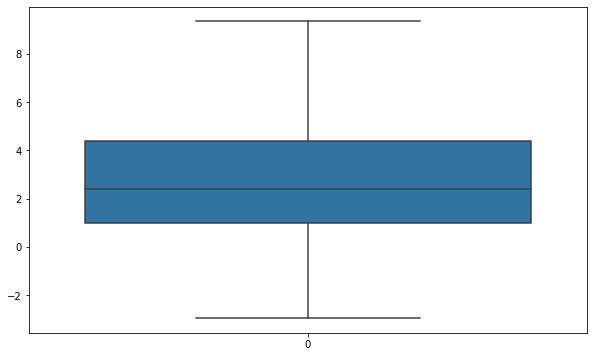

In [108]:
visualize_outliers(df["%variation_population"])

**%variation_population**

La distribution semble plutôt normale, sans outliers significatifs, avec des valeurs comprises entre -2 et 8 % environ. Cela indique que la majorité des pays ont des variations de population modérées.

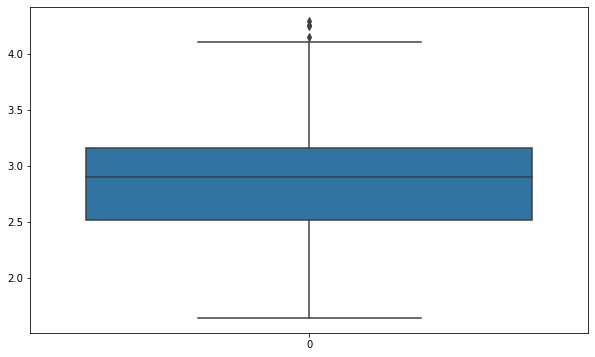

In [109]:
visualize_outliers(df["perf_logistique"])

In [110]:
df_LOGIQTIQUE=(df.loc[df["perf_logistique"]>4,:]).sort_values(by="perf_logistique", ascending=False)
df_LOGIQTIQUE

,pays,Code M49,code ISO2,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
11,Autriche,40.0,AT,AUT,47429.54,100.0,4.29,1.03,18.20,85.55,63.58,1.63
4,Allemagne,276.0,DE,DEU,44670.22,100.0,4.26,0.57,19.47,87.06,48.42,1.06
146,Suède,752.0,SE,SWE,53788.88,100.0,4.25,0.97,16.60,83.96,44.92,1.43
167,Émirats arabes unis,784.0,AE,ARE,42522.38,100.0,4.15,0.60,43.47,11.65,105.10,2.42
16,Belgique,56.0,BE,BEL,44162.26,100.0,4.11,0.42,12.65,304.61,222.37,1.17
50,Finlande,246.0,FI,FIN,46412.76,100.0,4.09,1.06,18.76,116.22,14.41,0.55
87,Luxembourg,442.0,LU,LUX,110203.01,100.0,4.06,1.31,18.33,0.00,100.00,4.44
124,Royaume-Uni de Grande-Bretagne et d'Irlande du...,826.0,GB,GBR,40617.68,100.0,4.06,0.38,31.94,81.20,34.87,1.32
75,Japon,392.0,JP,JPN,38928.95,100.0,4.03,1.10,18.50,91.72,44.27,-0.38
144,Suisse,756.0,CH,CHE,83353.60,100.0,4.02,1.24,15.72,68.42,38.35,1.92


**perf_logistique**

Il y a quelques outliers dans cette variable, mais la majorité des pays ont des valeurs comprises entre 2,75 et 3,25. Cela suggère que la plupart des pays ont une performance logistique moyenne.

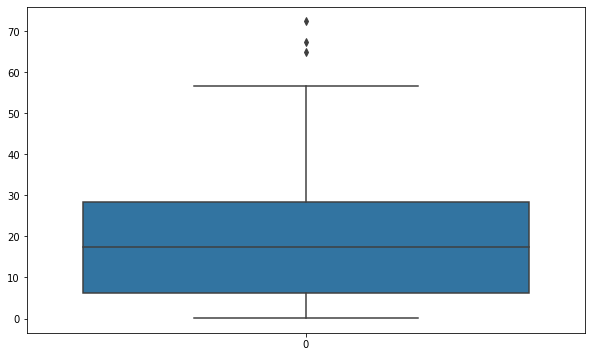

In [111]:
visualize_outliers(df["DA(kg/personne/an)"])

In [112]:
df_DA=(df.loc[df["DA(kg/personne/an)"]>60,:]).sort_values(by="DA(kg/personne/an)", ascending=False)
df_DA

,pays,Code M49,code ISO2,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
134,Saint-Vincent-et-les Grenadines,670.0,VC,VCT,8030.57,99.97,2.895814,0.87,72.31,0.0,112.50,0.62
72,Israël,376.0,IL,ISR,42756.83,100.00,3.690000,-0.89,67.39,98.9,0.00,3.33
136,Samoa,882.0,WS,WSM,4246.47,96.80,2.895814,1.16,64.77,0.0,113.33,0.95


**DA (kg/personne/an)**

La disponibilité alimentaire (en kg/personne/an) montre également quelques outliers avec la majorité des pays ayant des valeurs entre 10 et 25 kg/personne/an. Cependant, certains pays se distinguent avec une disponibilité alimentaire beaucoup plus élevée.

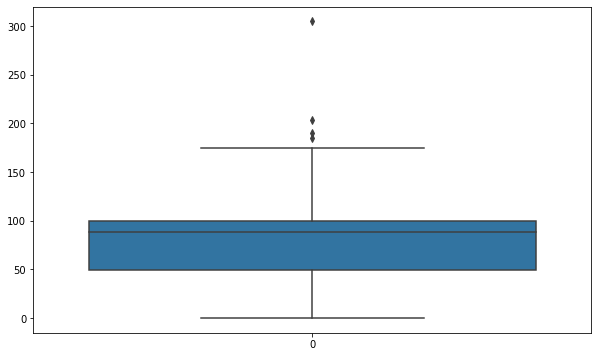

In [113]:
visualize_outliers(df["TAS"])

In [114]:
df_TAS=(df.loc[df["TAS"]>180,:]).sort_values(by="TAS", ascending=False)
df_TAS

,pays,Code M49,code ISO2,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
16,Belgique,56.0,BE,BEL,44162.26,100.0,4.11,0.42,12.65,304.61,222.37,1.17
119,Pologne,616.0,PL,POL,13615.44,100.0,3.45,0.51,30.30,203.37,4.76,-0.21
151,Thaïlande,764.0,TH,THA,6436.79,99.9,3.25,-0.75,12.95,190.24,0.23,0.72
65,Hongrie,348.0,HU,HUN,14619.78,100.0,3.41,0.80,25.27,185.34,21.80,-0.49


**TAS (Taux d'Auto-Suffisance)**
Le boxplot montre plusieurs outliers au-delà de 150 %. Cela signifie que certains pays ont une autosuffisance alimentaire très élevée, produisant bien plus que leur demande locale.

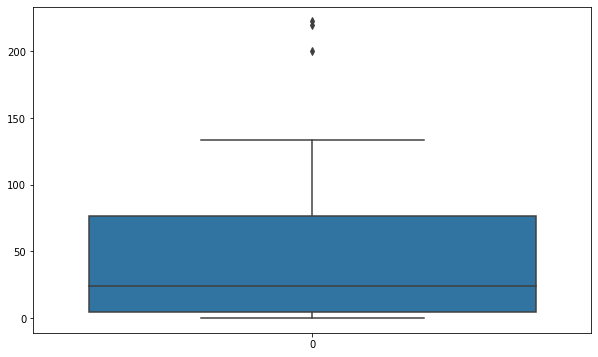

In [115]:
visualize_outliers(df["TDI"])

In [116]:
df_TDI=(df.loc[df["TDI"]>180,:]).sort_values(by="TDI", ascending=False)
df_TDI

,pays,Code M49,code ISO2,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
16,Belgique,56.0,BE,BEL,44162.26,100.00,4.110000,0.42,12.65,304.61,222.37,1.17
152,Timor-Leste,626.0,TL,TLS,1299.52,79.54,2.895814,0.07,4.24,20.00,220.00,3.93
54,Gambie,270.0,GM,GMB,632.02,56.20,2.895814,-0.09,3.53,25.00,200.00,6.14


**TDI (Taux de Dépendance des Importations)**

Nous avaons des outliers significatifs. Certains pays ont une forte dépendance aux importations de la viande de volaille

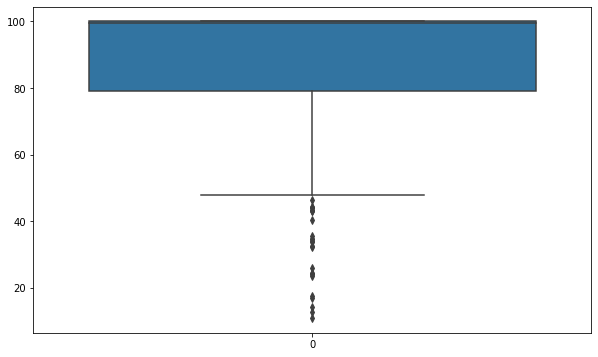

In [117]:
visualize_outliers(data=df["%pop_acces_electricite"])

In [118]:
df_ELECTRIC=(df.loc[df["%pop_acces_electricite"]<40,:]).sort_values(by="%pop_acces_electricite", ascending=False)
df_ELECTRIC

,pays,Code M49,code ISO2,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
59,Guinée,324.0,GN,GIN,843.46,35.40,2.230000,-0.70,4.08,26.00,74.00,5.56
93,Mali,466.0,ML,MLI,795.68,34.78,2.550000,-1.90,2.83,92.31,1.92,6.16
25,Bénin,204.0,BJ,BEN,1095.27,34.50,2.520000,0.03,14.40,11.18,76.40,5.67
125,Rwanda,646.0,RW,RWA,756.55,34.10,3.090000,0.08,1.49,100.00,0.00,5.38
82,Lesotho,426.0,LS,LSO,1061.92,33.70,1.980000,-0.19,7.93,11.76,88.24,1.58
112,Ouganda,800.0,UG,UGA,787.33,32.39,2.895814,-0.57,1.52,98.48,0.00,7.69
132,République-Unie de Tanzanie,834.0,TZ,TZA,972.63,32.10,2.895814,-0.57,1.88,97.22,1.85,6.17
60,Guinée-Bissau,624.0,GW,GNB,718.25,26.00,2.350000,-0.50,2.16,75.00,100.00,5.24
101,Mozambique,508.0,MZ,MOZ,462.70,24.30,2.895814,-0.92,3.59,79.31,20.69,5.94
85,Libéria,430.0,LR,LBR,576.03,24.20,2.010000,-0.32,10.67,30.00,96.00,5.14


**%pop_acces_electricite**

Il ya une forte concentration des pays proches de 100 % d'accès à l'électricité, avec quelques outliers significatifs. Cela montre que la majorité des pays disposent d'une bonne infrastructure électrique, à l'exception de quelques pays.

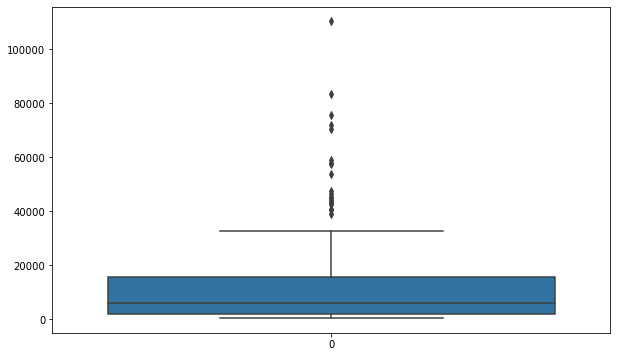

In [119]:
visualize_outliers(data=df["PIB"])

In [120]:
df_PIB_HAUT=(df.loc[df["PIB"]>40000,:]).sort_values(by="PIB", ascending=False)
df_PIB_HAUT

,pays,Code M49,code ISO2,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
87,Luxembourg,442.0,LU,LUX,110203.01,100.0,4.06,1.31,18.33,0.00,100.00,4.44
144,Suisse,756.0,CH,CHE,83353.60,100.0,4.02,1.24,15.72,68.42,38.35,1.92
107,Norvège,578.0,NO,NOR,75490.69,100.0,3.60,1.15,19.05,99.02,1.96,1.86
71,Islande,352.0,IS,ISL,71961.53,100.0,3.26,1.34,29.95,100.00,20.00,1.26
70,Irlande,372.0,IE,IRL,70491.99,100.0,3.62,0.99,25.82,85.94,77.34,2.17
169,États-Unis d'Amérique,840.0,US,USA,59059.60,100.0,3.98,0.26,55.68,119.97,0.67,1.31
42,Danemark,208.0,DK,DNK,57888.20,100.0,3.92,0.85,28.98,103.59,79.64,0.77
10,Australie,36.0,AU,AUS,57430.80,100.0,3.76,0.88,47.65,108.37,1.37,2.72
146,Suède,752.0,SE,SWE,53788.88,100.0,4.25,0.97,16.60,83.96,44.92,1.43
11,Autriche,40.0,AT,AUT,47429.54,100.0,4.29,1.03,18.20,85.55,63.58,1.63


**PIB (Produit Intérieur Brut)**

Nous avons un grand nombre d'outliers pour les pays ayant un PIB très élevé, avec une concentration de la majorité des pays dans une plage de PIB beaucoup plus faible.


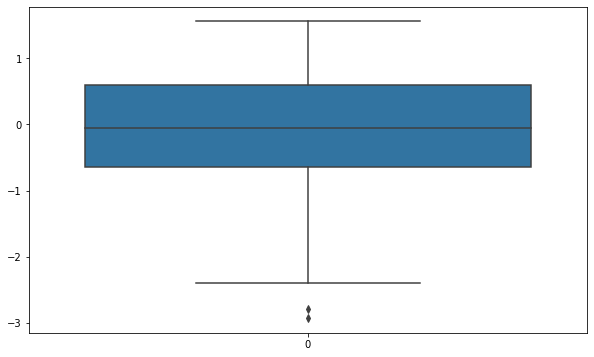

In [121]:
visualize_outliers(df["Stab_po"])

In [122]:
df_Stab_po=(df.loc[df["Stab_po"]<-2,:]).sort_values(by="Stab_po", ascending=False)
df_Stab_po

,pays,Code M49,code ISO2,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
69,Iraq,368.0,IQ,IRQ,4725.19,99.88,2.090000,-2.30,14.95,16.96,83.04,5.57
114,Pakistan,586.0,PK,PAK,1558.08,92.66,2.720000,-2.40,5.86,99.92,0.16,4.25
0,Afghanistan,4.0,AF,AFG,530.15,97.70,2.080000,-2.79,1.53,49.12,50.88,5.47
163,Yémen,887.0,YE,YEM,612.35,79.20,2.895814,-2.93,8.53,68.29,31.71,5.05


**Stab_po (Stabilité Politique)**
Nous avons plusieurs outliers pour les pays ayant une très faible stabilité politique, avec une majorité de pays autour de valeurs proches de zéro, indiquant une stabilité politique relativement neutre.

## Toutes les valeurs semblent cohérentes ; nous les conservons donc toutes.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 170
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pays                    164 non-null    object 
 1   Code M49                164 non-null    float64
 2   code ISO2               163 non-null    object 
 3   code ISO3               164 non-null    object 
 4   PIB                     164 non-null    float64
 5   %pop_acces_electricite  164 non-null    float64
 6   perf_logistique         164 non-null    float64
 7   Stab_po                 164 non-null    float64
 8   DA(kg/personne/an)      164 non-null    float64
 9   TAS                     164 non-null    float64
 10  TDI                     164 non-null    float64
 11  %variation_population   164 non-null    float64
dtypes: float64(9), object(3)
memory usage: 20.7+ KB


In [124]:
df.describe()

,Code M49,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,432.920732,13123.871890,84.096341,2.895814,-0.098049,19.709329,78.677062,41.811111,2.632744
std,253.494811,18525.179398,25.638521,0.558543,0.890253,15.685095,44.919155,44.610415,2.348894
min,4.000000,414.740000,10.900000,1.640000,-2.930000,0.130000,0.000000,0.000000,-2.950000
25%,217.000000,1932.702500,79.150000,2.520000,-0.642500,6.282500,49.780000,4.162500,0.995000
50%,420.000000,5799.935000,99.565000,2.895814,-0.050000,17.325000,87.955000,24.255000,2.410000
75%,649.250000,15719.047500,100.000000,3.157500,0.605000,28.387500,100.000000,76.635000,4.367500
max,894.000000,110203.010000,100.000000,4.290000,1.560000,72.310000,304.610000,222.370000,9.340000


# F- Distribution des variables 

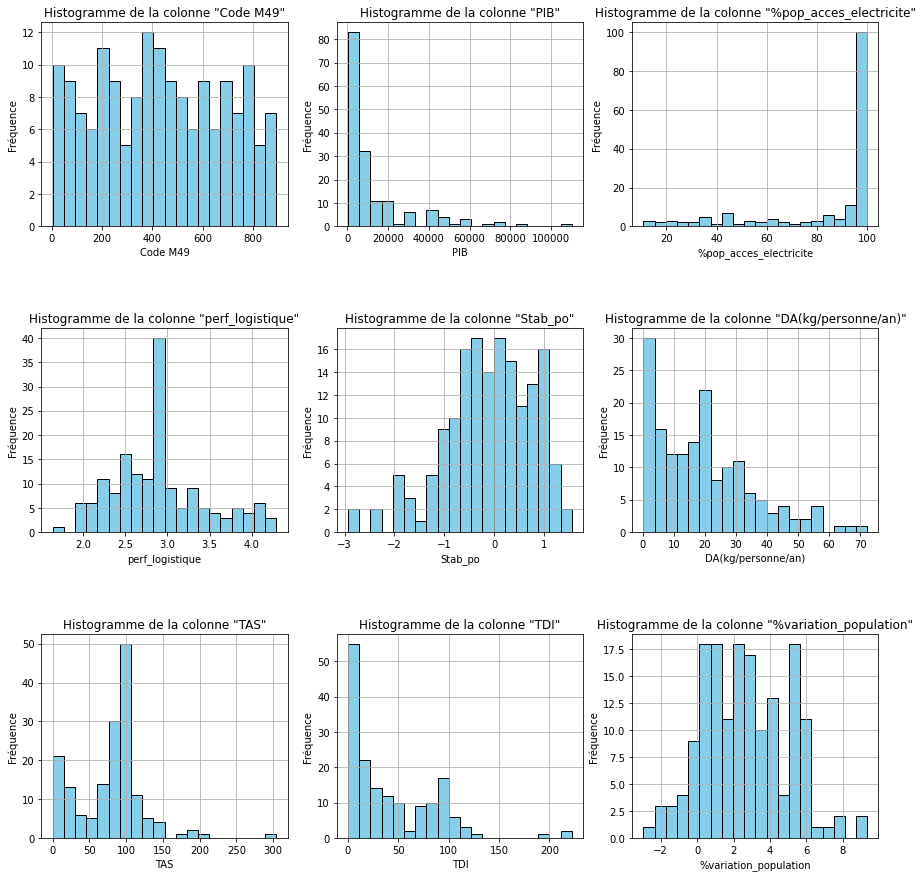

In [125]:
import matplotlib.pyplot as plt
import math

def distri_variables(df):
    """
    Trace plusieurs histogrammes par ligne pour chaque colonne numérique du DataFrame.
    """
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns
    num_cols = len(numeric_cols)
    num_plots_per_row = 3  # Nombre d'histogrammes par ligne
    num_rows = math.ceil(num_cols / num_plots_per_row)
    
    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    fig.subplots_adjust(hspace=0.5)  
    
    for i, col in enumerate(numeric_cols):
        ax = axes[i // num_plots_per_row, i % num_plots_per_row]  # Sélectionne le sous-graphique approprié
        ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f'Histogramme de la colonne "{col}"')
        ax.set_xlabel(col)
        ax.set_ylabel('Fréquence')
        ax.grid(True)
    
    # Cache les axes inutilisés
    for i in range(num_cols, num_rows*num_plots_per_row):
        fig.delaxes(axes.flatten()[i])
    
    plt.show()

# Utilisation :
distri_variables(df)

## Synthèse de l'Analyse des Variables

1. **PIB** : Distribution fortement asymétrique avec une majorité de pays à faible PIB et quelques pays riches, typique des inégalités économiques mondiales.


2. **%pop_acces_electricite** : Concentration élevée autour de 100 %, la plupart des pays ayant un bon accès à l'électricité, avec quelques exceptions.


3. **Perf_logistique** : Distribution normale centrée autour de 3, indiquant des performances logistiques moyennes pour la majorité des pays.


4. **Stab_po (stabilité politique)** : Légère asymétrie vers les valeurs négatives, montrant une instabilité politique dans de nombreux pays.


5. **DA (Disponibilité Alimentaire en kg/personne/an)** : Asymétrie marquée, la plupart des pays ayant une faible disponibilité alimentaire par habitant.


6. **TAS (Taux d'Auto-Suffisance)** : La majorité des pays sont autosuffisants, avec une concentration autour de 100 %.


7. **TDI (Taux de Dépendance des Importations)** : Faible dépendance pour la majorité des pays, mais certains dépendent fortement des importations.


8. **%variation_population** : Distribution normale, avec une majorité de pays ayant une croissance modérée (3-4 %).


### Conclusion
Certaines variables montrent des distributions asymétriques, révélant des disparités entre pays (comme le PIB et la disponibilité alimentaire), tandis que d'autres (comme la logistique et la croissance démographique) sont plus homogènes. Ces résultats peuvent orienter la stratégie d'exportation vers des marchés spécifiques.


# G- Etude de la colinearite entre les variable

In [126]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
correlation_matrix

Matrice de corrélation :


,Code M49,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
Code M49,1.000000,-0.017519,-0.082568,0.051938,-0.087208,-0.061286,-0.004655,-0.075323,0.077426
PIB,-0.017519,1.000000,0.388073,0.729119,0.533275,0.356005,0.119377,0.062895,-0.259661
%pop_acces_electricite,-0.082568,0.388073,1.000000,0.370900,0.365394,0.524595,0.113851,0.003055,-0.585265
perf_logistique,0.051938,0.729119,0.370900,1.000000,0.456143,0.313574,0.323088,-0.039694,-0.311944
Stab_po,-0.087208,0.533275,0.365394,0.456143,1.000000,0.429995,-0.082120,0.292587,-0.402008
DA(kg/personne/an),-0.061286,0.356005,0.524595,0.313574,0.429995,1.000000,-0.070353,0.034917,-0.389043
TAS,-0.004655,0.119377,0.113851,0.323088,-0.082120,-0.070353,1.000000,-0.537650,-0.257044
TDI,-0.075323,0.062895,0.003055,-0.039694,0.292587,0.034917,-0.537650,1.000000,0.055222
%variation_population,0.077426,-0.259661,-0.585265,-0.311944,-0.402008,-0.389043,-0.257044,0.055222,1.000000


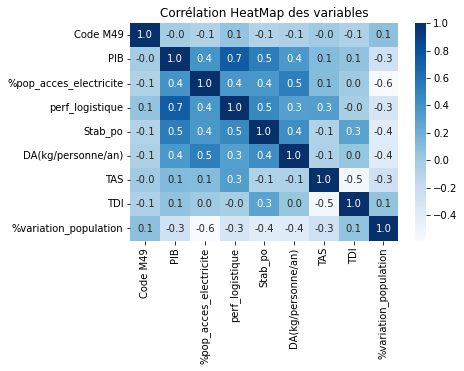

In [127]:
#Méthode .corr() avec par défaut la formule de la corrélation linéaire de Pearson
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Blues')

plt.title('Corrélation HeatMap des variables')

plt.show()

### Interprétation des Résultats

Les différentes corrélations identifiées dans l'analyse de la matrice de corrélation impliquent plusieurs conclusions importantes :
#### 1. **PIB et Performance Logistique**
Une forte corrélation positive entre le PIB et la performance logistique suggère que des améliorations dans la logistique peuvent stimuler la croissance économique. Des infrastructures logistiques efficaces facilitent le commerce et la distribution des biens, ce qui peut entraîner une augmentation du PIB.

#### 2. **Accès à l'Électricité et PIB**
La corrélation modérée entre l'accès à l'électricité et le PIB indique que des progrès dans l'accès à l'électricité peuvent contribuer à la croissance économique. L'électricité est essentielle pour les entreprises, l'industrie et les services, donc une meilleure accessibilité peut stimuler l'activité économique.

#### 3. **Stabilité Politique et PIB**
Une corrélation modérée entre la stabilité politique et le PIB suggère que la stabilité politique favorise un environnement propice aux investissements et à la croissance économique. Les investisseurs tendent à être plus confiants dans les économies politiquement stables, ce qui peut conduire à une augmentation du PIB.

#### 4. **Variation de la Population et Accès à l'Électricité / Stabilité Politique / Performance Logistique**
Les corrélations négatives entre la variation de la population et des indicateurs tels que l'accès à l'électricité, la stabilité politique et la performance logistique montrent que des améliorations dans ces domaines peuvent contribuer à atténuer les variations de la population. Par exemple, une meilleure accessibilité à l'électricité et une stabilité politique peuvent créer un environnement plus attractif pour les populations, contribuant ainsi à une moindre variabilité démographique.


In [128]:
df.head()

,pays,Code M49,code ISO2,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
0,Afghanistan,4.0,AF,AFG,530.15,97.70,2.080000,-2.79,1.53,49.12,50.88,5.47
1,Afrique du Sud,710.0,ZA,ZAF,6723.93,84.40,3.750000,-0.28,35.69,78.71,24.27,2.93
2,Albanie,8.0,AL,ALB,4521.75,99.89,2.895814,0.37,16.36,27.66,80.85,-0.22
3,Algérie,12.0,DZ,DZA,4134.94,99.53,2.670000,-0.92,6.38,99.28,0.72,4.18
4,Allemagne,276.0,DE,DEU,44670.22,100.00,4.260000,0.57,19.47,87.06,48.42,1.06


In [129]:
df_code=df

In [130]:
df_final=df.drop(columns=["Code M49","code ISO2"])

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 170
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pays                    164 non-null    object 
 1   code ISO3               164 non-null    object 
 2   PIB                     164 non-null    float64
 3   %pop_acces_electricite  164 non-null    float64
 4   perf_logistique         164 non-null    float64
 5   Stab_po                 164 non-null    float64
 6   DA(kg/personne/an)      164 non-null    float64
 7   TAS                     164 non-null    float64
 8   TDI                     164 non-null    float64
 9   %variation_population   164 non-null    float64
dtypes: float64(8), object(2)
memory usage: 18.2+ KB


In [131]:
df_code

,pays,Code M49,code ISO2,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
0,Afghanistan,4.0,AF,AFG,530.15,97.70,2.080000,-2.79,1.53,49.12,50.88,5.47
1,Afrique du Sud,710.0,ZA,ZAF,6723.93,84.40,3.750000,-0.28,35.69,78.71,24.27,2.93
2,Albanie,8.0,AL,ALB,4521.75,99.89,2.895814,0.37,16.36,27.66,80.85,-0.22
3,Algérie,12.0,DZ,DZA,4134.94,99.53,2.670000,-0.92,6.38,99.28,0.72,4.18
4,Allemagne,276.0,DE,DEU,44670.22,100.00,4.260000,0.57,19.47,87.06,48.42,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...
166,Égypte,818.0,EG,EGY,1917.05,100.00,3.110000,-1.43,12.96,89.44,8.80,4.33
167,Émirats arabes unis,784.0,AE,ARE,42522.38,100.00,4.150000,0.60,43.47,11.65,105.10,2.42
168,Équateur,218.0,EC,ECU,6246.40,99.20,2.860000,-0.08,19.31,99.71,0.00,3.54
169,États-Unis d'Amérique,840.0,US,USA,59059.60,100.00,3.980000,0.26,55.68,119.97,0.67,1.31


In [132]:
df_final

,pays,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
0,Afghanistan,AFG,530.15,97.70,2.080000,-2.79,1.53,49.12,50.88,5.47
1,Afrique du Sud,ZAF,6723.93,84.40,3.750000,-0.28,35.69,78.71,24.27,2.93
2,Albanie,ALB,4521.75,99.89,2.895814,0.37,16.36,27.66,80.85,-0.22
3,Algérie,DZA,4134.94,99.53,2.670000,-0.92,6.38,99.28,0.72,4.18
4,Allemagne,DEU,44670.22,100.00,4.260000,0.57,19.47,87.06,48.42,1.06
...,...,...,...,...,...,...,...,...,...,...
166,Égypte,EGY,1917.05,100.00,3.110000,-1.43,12.96,89.44,8.80,4.33
167,Émirats arabes unis,ARE,42522.38,100.00,4.150000,0.60,43.47,11.65,105.10,2.42
168,Équateur,ECU,6246.40,99.20,2.860000,-0.08,19.31,99.71,0.00,3.54
169,États-Unis d'Amérique,USA,59059.60,100.00,3.980000,0.26,55.68,119.97,0.67,1.31


# Map mondes des pays selectionnés

In [133]:


# données géographiques du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrage des données pour inclure uniquement nos pays 
pays_a_afficher = df_code['code ISO3'].unique()
world_subset = world[world['iso_a3'].isin(pays_a_afficher)]


# Identification des pays non affichés
pays_non_affiches = [pays for pays in pays_a_afficher if pays not in world_subset['iso_a3'].unique()]
print("Les pays suivants n'ont pas été affichés sur la carte :")
for pays in pays_non_affiches:
    print(pays)

C:\Users\33618\AppData\Local\Temp\ipykernel_11152\994785182.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Les pays suivants n'ont pas été affichés sur la carte :
ATG
BRB
CPV
DMA
GRD
KIR
MDV
MLT
MUS
KNA
VCT
LCA
WSM
STP


Mise à jour du fichier word

In [134]:
 # Création d'une liste de dictionnaires contenant les informations sur les pays à ajouter
pays_liste = [
    {"name": "Antigua-et-Barbuda","continent": "Amérique du Nord", "iso_a3":"ATG","latitude": 17.223472, "longitude": -61.955461},
    {"name": "Barbade","continent": "Amérique du Nord", "iso_a3":"BRB", "latitude": 13.150033, "longitude": -59.525030},
    {"name": "Cabo Verde","continent":"Afrique", "iso_a3":"CPV", "latitude": 16.000055, "longitude": -24.008395},
    {"name": "Dominique","continent":"Amérique du Nord", "iso_a3":"DMA", "latitude": 15.411314, "longitude": -61.365362},
    {"name": "Grenade","continent":"Amérique du Nord", "iso_a3":"GRD", "latitude": 12.136037, "longitude": -61.690404},
    {"name": "Kiribati","continent": "Océanie", "iso_a3":"KIR", "latitude": 0.344861, "longitude": 173.664177},
    {"name": "Maldives","continent": "Asie", "iso_a3":"MDV", "latitude": 3.720350, "longitude": 73.224415},
    {"name": "Malte","continent":"Europe",  "iso_a3":"MLT", "latitude": 35.888599, "longitude": 14.447691},
    {"name": "Maurice", "continent":"Afrique", "iso_a3":"MUS", "latitude": -20.275945, "longitude": 57.570357},
    {"name": "Saint-Kitts-et-Nevis","continent": "Amérique du Nord", "iso_a3":"KNA", "latitude": 17.250512, "longitude": -62.672597},
    {"name": "Saint-Vincent-et-les Grenadines","continent": "Amérique du Nord", "iso_a3":"VCT", "latitude": 12.904470, "longitude": -61.276557},
    {"name": "Sainte-Lucie","continent":"Amérique du Nord",  "iso_a3":"LCA", "latitude": 13.825049, "longitude": -60.975036},
    {"name": "Samoa","continent": "Océanie", "iso_a3":"WSM", "latitude": -13.769390, "longitude": -172.120050},
    {"name": "Sao Tomé-et-Principe","continent":"Afrique", "iso_a3":"STP", "latitude": 0.971310, "longitude": 7.022550}
]

# Conversion des coordonnées en géométries Point
geom_points = [Point(lon, lat) for lon, lat in zip([item["longitude"] for item in pays_liste], \
                                                   [item["latitude"] for item in pays_liste])]

# Création d'un GeoDataFrame avec les informations sur les pays et leurs géométries Point
pays_df = gpd.GeoDataFrame(pays_liste, geometry=geom_points)

# Ajout des nouveaux pays au GeoDataFrame world
world = world.append(pays_df, ignore_index=True)


world

C:\Users\33618\AppData\Local\Temp\ipykernel_11152\3905725376.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world = world.append(pays_df, ignore_index=True)
C:\Users\33618\anaconda3\lib\site-packages\geopandas\array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,latitude,longitude
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN
...,...,...,...,...,...,...,...,...
186,NaN,Amérique du Nord,Saint-Kitts-et-Nevis,KNA,NaN,POINT (-62.67260 17.25051),17.250512,-62.672597
187,NaN,Amérique du Nord,Saint-Vincent-et-les Grenadines,VCT,NaN,POINT (-61.27656 12.90447),12.904470,-61.276557
188,NaN,Amérique du Nord,Sainte-Lucie,LCA,NaN,POINT (-60.97504 13.82505),13.825049,-60.975036
189,NaN,Océanie,Samoa,WSM,NaN,POINT (-172.12005 -13.76939),-13.769390,-172.120050


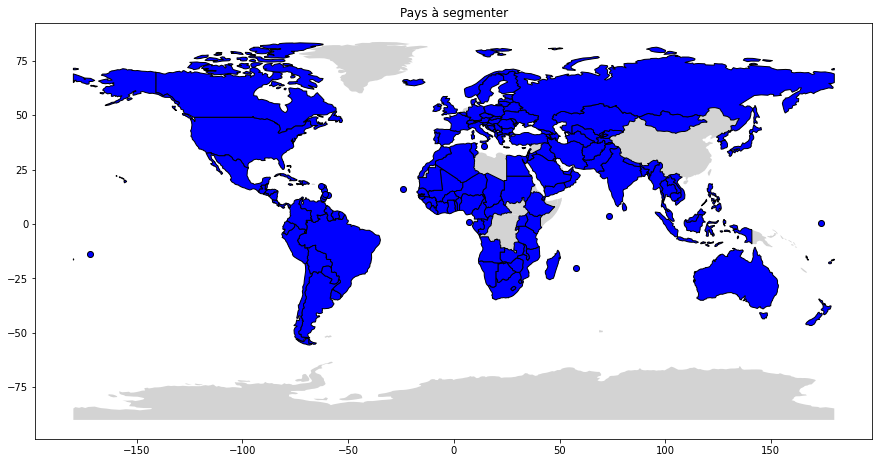

In [135]:
# Filtre des données pour inclure uniquement les pays du df
pays_a_afficher = df_final['code ISO3'].unique()
world_subset = world[world['iso_a3'].isin(pays_a_afficher)]

# Carte du monde avec les pays du df
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
world_subset.plot(ax=ax, color='blue', edgecolor='black')
plt.title('Pays à segmenter')
plt.show()



In [136]:
# verification des pays non affichés
pays_non_affiches = [pays for pays in pays_a_afficher if pays not in world_subset['iso_a3'].unique()]
print("Les pays suivants n'ont pas été affichés sur la carte :")
for pays in pays_non_affiches:
    print(pays)

Les pays suivants n'ont pas été affichés sur la carte :


### Export des données

In [137]:
save_path = r"C:data\data"
df_final = "data_ok.csv"

In [138]:
world.to_csv("data\world.csv", index=False)